In [2]:
# Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy.signal import find_peaks
import seaborn as sns

### Part 1 - Data import

First, the data is imported before it can be utilized for analysis. The focus is exclusively on passengers, hence cargo is excluded from the dataset. Sequentially, the data for monthly and yearly flights is initially imported. Subsequently, the economic factors of wealth and GDP are imported. 

In [3]:
flight_data = pd.read_csv('Monthly_figures_on_aviation_11102023_111803.csv', delimiter = ';')
flight_data_year = pd.read_csv('Monthly_figures_on_aviation_11102023_103331.csv', delimiter = ';')

#Dropping irrelevant columns
flight_data.drop(columns=['Commercial air traffic/Cargo/Total cargo/Total cargo (ton)', 'Commercial air traffic/Mail/Total mail/Total mail (ton)'], inplace=True)
flight_data_year.drop(columns=['Commercial air traffic/Cargo/Total cargo/Total cargo (ton)', 'Commercial air traffic/Mail/Total mail/Total mail (ton)'], inplace=True)

flight_data['Periods'] = pd.to_datetime(flight_data['Periods'], format='%Y %B', errors='coerce')
flight_data_year['Periods'] = pd.to_datetime(flight_data_year['Periods'], format='%Y', errors='coerce')

flight_data.head()

Airports    Periods  \
0  Total Dutch airports 1999-01-01   
1  Total Dutch airports 1999-02-01   
2  Total Dutch airports 1999-03-01   
3  Total Dutch airports 1999-04-01   
4  Total Dutch airports 1999-05-01   

   Aircraft movements/Cross-country flights (number)  \
0                                              36810   
1                                              34356   
2                                              41290   
3                                              41338   
4                                              44679   

   Aircraft movements/Local flights (number)  \
0                                      14868   
1                                      11314   
2                                      18152   
3                                      18043   
4                                      18932   

   Commercial air traffic/Flights/All flights/Total flights (number)  \
0                                              33145                   
1                                              30912                   
2                                              35591                   
3                                              35832                   
4                                              38376                   

   Commercial air traffic/Flights/All flights/Scheduled (number)  \
0                                            31222.0               
1                                            29015.0               
2                                            33278.0               
3                                            33114.0               
4                                            34138.0               

   Commercial air traffic/Passengers/Total passengers/Total passengers (number)  
0                                            2439980                             
1                                            2405830                             
2                                            2905023                             
3                                            2983754                             
4                                            3399339

In [4]:
#Data preperation dataframe 1 about the wealth
data = 'Wealth_households__components_of_wealth_19102023_113649.csv'
wealth = pd.read_csv(data, delimiter = ';')
wealth.iloc[15,2] = '2021'
wealth['Mean wealth (1 000 euros)'] = wealth['Mean wealth (1 000 euros)'].str.replace(',', '.').astype(float)
display(wealth)

Household characteristics Components of wealth Periods  \
0         Private households               Wealth    2006   
1         Private households               Wealth    2007   
2         Private households               Wealth    2008   
3         Private households               Wealth    2009   
4         Private households               Wealth    2010   
5         Private households               Wealth    2011   
6         Private households               Wealth    2012   
7         Private households               Wealth    2013   
8         Private households               Wealth    2014   
9         Private households               Wealth    2015   
10        Private households               Wealth    2016   
11        Private households               Wealth    2017   
12        Private households               Wealth    2018   
13        Private households               Wealth    2019   
14        Private households               Wealth    2020   
15        Private households               Wealth    2021   

   Number of private households  (x 1 000) Total wealth (bn euros)  \
0                                   7024,5                  1146,4   
1                                   7081,5                  1222,9   
2                                     7146                  1309,3   
3                                   7214,8                  1274,9   
4                                   7281,3                    1253   
5                                   7347,6                  1240,3   
6                                   7412,1                  1174,6   
7                                   7467,8                    1123   
8                                   7496,4                  1131,2   
9                                   7568,5                  1214,3   
10                                  7623,2                  1271,5   
11                                  7694,9                  1404,9   
12                                  7760,6                  1551,6   
13                                  7827,4                  1697,3   
14                                  7894,5                    1888   
15                                  7948,7                  2072,4   

    Mean wealth (1 000 euros) Median wealth (1 000 euros)  
0                       163.2                        33,1  
1                       172.7                        40,3  
2                       183.2                        44,6  
3                       176.7                        40,1  
4                       172.1                        32,7  
5                       168.8                        31,8  
6                       158.5                        25,1  
7                       150.4                        17,2  
8                       150.9                        17,3  
9                       160.4                        20,9  
10                      166.8                        23,5  
11                      182.6                        30,2  
12                      199.9                        39,4  
13                      216.8                        52,4  
14                      239.2                        65,3  
15                      260.7                        87,3

In [7]:
#Data preperation dataframe 2 about the flights
df = 'Monthly_figures_on_aviation_19102023_113618.csv'
flight = pd.read_csv(df, delimiter =';')
flight.rename(columns={'Commercial air traffic/Flights/All flights/Total flights (number)': 'Total flights'}, inplace=True)
flight.rename(columns={'Commercial air traffic/Passengers/Total passengers/Total passengers (number)': 'Total passengers'}, inplace=True)
flight['Amsterdam Schiphol Airport flights'] = [423122, 435972, 428332, 391265, 386316, 420245, 423405, 425565, 438295, 450673, 478864, 496739, 499444, 496827, 227275, 266956]
flight['Eindhoven Airport flights'] = [11398, 12390, 14491, 13432, 16244, 19680, 22450, 24593, 27023, 28835, 30910, 34929, 37035, 40209, 17875, 20524]
flight['Rotterdam Airport flights'] = [18276, 18555, 17447, 15397, 14643, 14948, 15245, 18659, 18790, 19022, 19055, 16270, 17615, 18406, 6337, 8307]
display(flight)

Airports  Periods  Total flights  Total passengers  \
0   Total Dutch airports     2006         467332          48596556   
1   Total Dutch airports     2007         479506          50517673   
2   Total Dutch airports     2008         473563          50425690   
3   Total Dutch airports     2009         429129          46455743   
4   Total Dutch airports     2010         427392          48591528   
5   Total Dutch airports     2011         462330          53868142   
6   Total Dutch airports     2012         468581          55653320   
7   Total Dutch airports     2013         476792          58047513   
8   Total Dutch airports     2014         491024          60932617   
9   Total Dutch airports     2015         504967          64634615   
10  Total Dutch airports     2016         535242          70279566   
11  Total Dutch airports     2017         555785          76203629   
12  Total Dutch airports     2018         564546          79606318   
13  Total Dutch airports     2019         566031          81167301   
14  Total Dutch airports     2020         258226          23585744   
15  Total Dutch airports     2021         303062          29069535   

    Commercial air traffic/Cargo/Total cargo/Total cargo (ton)  \
0                                             1581305            
1                                             1668673            
2                                             1623778            
3                                             1340756            
4                                             1574598            
5                                             1589253            
6                                             1536055            
7                                             1585170            
8                                             1689976            
9                                             1677452            
10                                            1722236            
11                                            1839139            
12                                            1818955            
13                                            1681703            
14                                            1577582            
15                                            1795298            

    Commercial air traffic/Mail/Total mail/Total mail (ton)  \
0                                               40321         
1                                               41103         
2                                               34873         
3                                               30749         
4                                               25878         
5                                               25880         
6                                               28375         
7                                               34872         
8                                               37481         
9                                               34385         
10                                              32453         
11                                              25813         
12                                              21486         
13                                              21959         
14                                              14831         
15                                              13550         

    Amsterdam Schiphol Airport flights  Eindhoven Airport flights  \
0                               423122                      11398   
1                               435972                      12390   
2                               428332                      14491   
3                               391265                      13432   
4                               386316                      16244   
5                               420245                      19680   
6                               423405                      22450   
7                               425565                      24593   
8        

In [8]:
gdp_data = pd.read_csv('Quarterly_National_Accounts__values_08112023_213454.csv', delimiter=';')
gdp_data.drop(columns=['Type of data'], inplace=True)
gdp_data.rename(columns={'Expenditure approach to GDP/Disposable for final expenditure/Gross domestic product (million euros)': 'GDP (million euros)'}, inplace=True)
gdp_data

Periods  GDP (million euros)
0     1997               369046
1     1998               394295
2     1999               419459
3     2000               452007
4     2001               481881
5     2002               501137
6     2003               512810
7     2004               529286
8     2005               550883
9     2006               584546
10    2007               619170
11    2008               647198
12    2009               624842
13    2010               639187
14    2011               650359
15    2012               652966
16    2013               660463
17    2014               671560
18    2015               690008
19    2016               708337
20    2017               738146
21    2018               773987
22    2019               813055
23    2020               796530
24    2021               870587
25   2022*               958549

### Part 2 - Data processing

In this part, the imported flight data will be analysed to identify the trends in the data. The the scipy feature to find peaks will be used to find peaks and valleys in the data over time. 

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()
/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



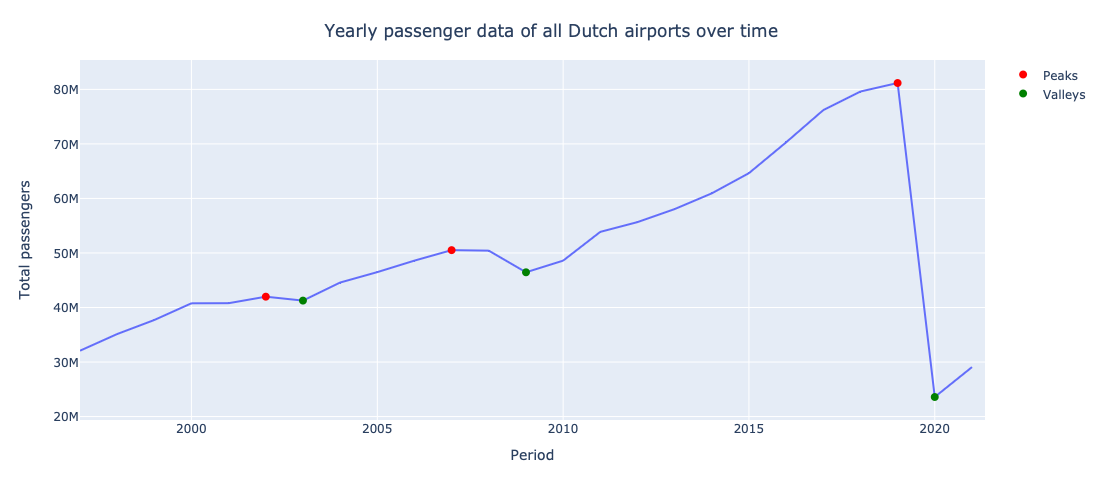

In [9]:
#creating a line chart
fig = px.line(flight_data_year[flight_data_year['Airports'] == 'Total Dutch airports'], x='Periods', y='Commercial air traffic/Passengers/Total passengers/Total passengers (number)')
fig.update_layout(height=500, xaxis_title='Period', yaxis_title='Total passengers')

# Finding peaks and valleys 
data = flight_data_year[flight_data_year['Airports'] == 'Total Dutch airports']['Commercial air traffic/Passengers/Total passengers/Total passengers (number)']
peaks = find_peaks(data, height=0)[0]
valleys = find_peaks(-data)[0]  

# Get corresponding x-values (periods) for peaks and valleys
periods = flight_data_year[flight_data_year['Airports'] == 'Total Dutch airports']['Periods']

# Add markers for peaks and valleys with correct x-values and labels
peak_labels = [f'Peak: {data.iloc[peak]} passengers, {periods.iloc[peak]}' for peak in peaks]
valley_labels = [f'Valley: {data.iloc[valley]} passengers, {periods.iloc[valley]}' for valley in valleys]

# Add markers for peaks and valleys with correct x-values
fig.add_trace(go.Scatter(x=periods.iloc[peaks], y=data.iloc[peaks],
                    mode='markers',
                    marker=dict(color='red', size=8),
                    name='Peaks'))
fig.add_trace(go.Scatter(x=periods.iloc[valleys], y=data.iloc[valleys],
                    mode='markers',
                    marker=dict(color='green', size=8),
                    name='Valleys'))

# Set title
fig.update_layout(title={'text': 'Yearly passenger data of all Dutch airports over time', 'y':0.95, 'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.show()

In the yearly data of total passengers flying from Dutch airports, one minor valley and two major valleys can be identified. The first valley is in 2003. This is only a minor decline compared to 2002, and takes only one year. After 2007, the number of passenger sees a bigger an longer decrease whereafter the total count alomost doubles in ten years, between 2009 and 2019. The year of 2020 sees the biggest drop in passenger numbers, with only a fourth of the total passengers from 2019 left in 2020.  

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old beh

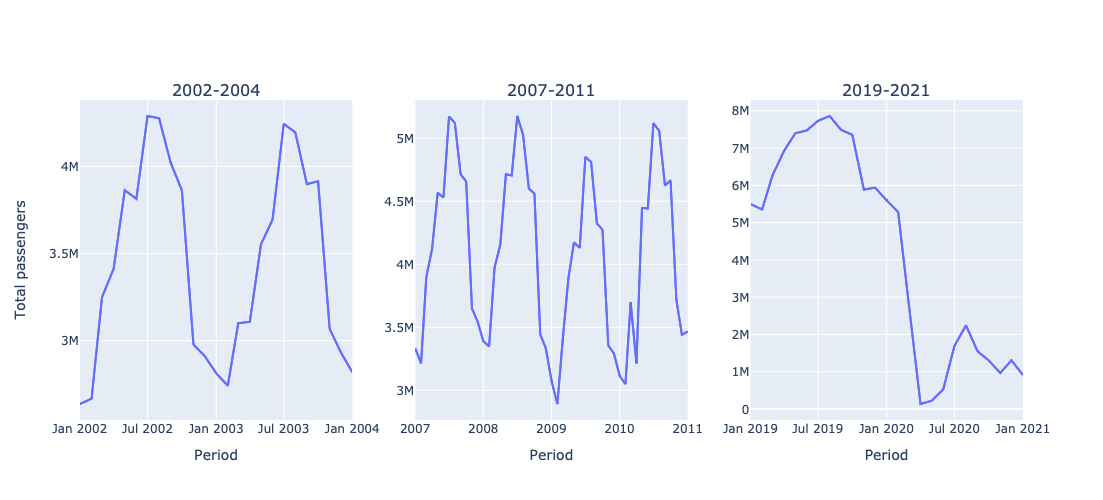

In [10]:
# Filter the data for the specified periods
periods = ['2002-2004', '2007-2011', '2019-2021']
start_dates = ['2002 January', '2007 January', '2019 January']
end_dates = ['2004 January', '2011 January', '2021 January']

filtered_data = [
    flight_data[
        (flight_data['Periods'] >= pd.to_datetime(start_date, format='%Y %B')) &
        (flight_data['Periods'] <= pd.to_datetime(end_date, format='%Y %B'))
    ]
    for start_date, end_date in zip(start_dates, end_dates)
]

# Create subplots
fig = make_subplots(rows=1, cols=len(periods), subplot_titles=periods)

# Plot the data for each period
for i, data in enumerate(filtered_data):
    fig.add_trace(px.line(data[data['Airports'] == 'Total Dutch airports'], x='Periods', y='Commercial air traffic/Passengers/Total passengers/Total passengers (number)').data[0], row=1, col=i + 1)

# Update layout
fig.update_layout(height=500, yaxis_title='Total passengers')

# Update x-axis title
for i, data in enumerate(filtered_data):
    trace = px.line(data[data['Airports'] == 'Total Dutch airports'], x='Periods', y='Commercial air traffic/Passengers/Total passengers/Total passengers (number)').data[0]
    fig.add_trace(trace, row=1, col=i + 1)

    # Update x-axis title for each subplot
    fig.update_xaxes(title_text='Period', row=1, col=i + 1)

# Show the plot
fig.show()

Zooming in on the periods with the peaks now with total passengers per month, we can identify trends more specifically. 

**Small Dip in 2003:**
* Slight decrease in the number of flights during the summer of 2003, followed by a recovery with higher passenger numbers compared to 2002.

**Decline from 2007 to 2011:**
* Significant decrease in the number of flights from February 2009 to October 2009, indicating a major impact, possibly due to the global financial crisis.
* Drop in the number of flights in April 2010, suggesting a specific event or circumstance affecting air travel during that month. Further research shows us many flights within, to, and from Europe were cancelled following the 14 April 2010 eruption of Eyjafjallajökull in Iceland.

**Passenger Numbers in 2019 to 2021:**
* High passenger numbers in the summer of 2019.
* Nearly zero flights recorded in April 2020 due to widespread travel restrictions and lockdowns caused by the COVID-19 pandemic.
* Partial recovery in the number of flights during the summer of 2021, followed by a subsequent decline.


/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



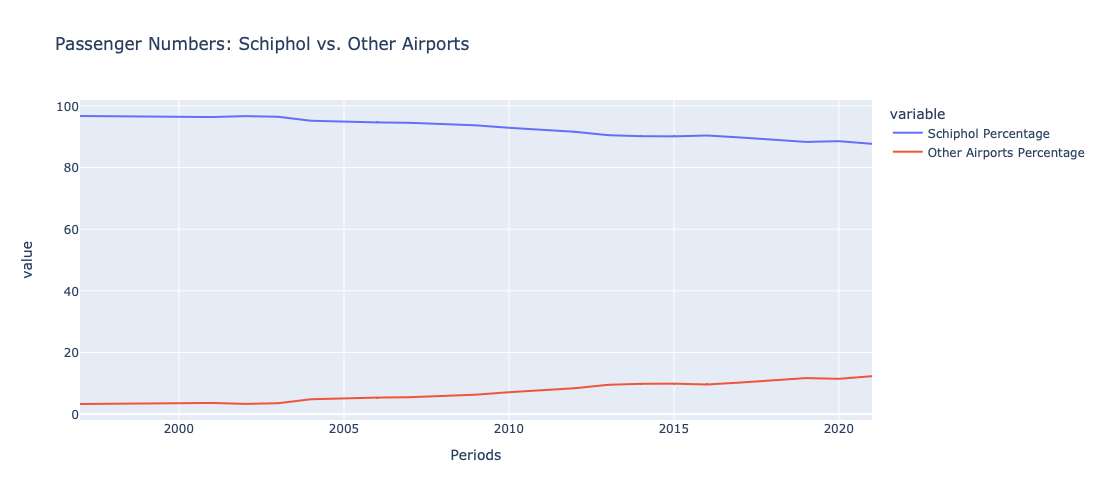

In [11]:
# Filter data for Amsterdam Airport Schiphol
schiphol_data = flight_data_year[flight_data_year['Airports'] == 'Amsterdam Airport Schiphol']
schiphol_passengers = schiphol_data.groupby('Periods')['Commercial air traffic/Passengers/Total passengers/Total passengers (number)'].sum()

# Filter data for other airports
other_airports = ['Rotterdam The Hague Airport', 'Eindhoven Airport', 'Maastricht Aachen Airport', 'Groningen Airport Eelde']
other_data = flight_data_year[flight_data_year['Airports'].isin(other_airports)]
other_passengers = other_data.groupby('Periods')['Commercial air traffic/Passengers/Total passengers/Total passengers (number)'].sum()

# Create a new DataFrame with the desired columns
passenger_df = pd.DataFrame({
    'Periods': schiphol_passengers.index,
    'Passengers Schiphol': schiphol_passengers.values,
    'Passengers Other Airports': other_passengers.values
})

# Calculate the percentage share
passenger_df['Schiphol Percentage'] = (passenger_df['Passengers Schiphol'] / (passenger_df['Passengers Schiphol'] + passenger_df['Passengers Other Airports'])) * 100
passenger_df['Other Airports Percentage'] = (passenger_df['Passengers Other Airports'] / (passenger_df['Passengers Schiphol'] + passenger_df['Passengers Other Airports'])) * 100

# Display the updated DataFrame
passenger_df

# Assuming you have the passenger_df DataFrame
fig = px.line(passenger_df, x='Periods', y=['Schiphol Percentage', 'Other Airports Percentage'],
              title='Passenger Numbers: Schiphol vs. Other Airports',
              labels={'Passengers Schiphol': 'Schiphol Passengers', 'Passengers Other Airports': 'Other Airports Passengers'})

fig.update_layout(width=1100, height=500)

fig.show()


According to this graph, there is a relatively increasing number of passengers over time using Eindhoven, Rotterdam, Maastricht or Groningen Eelde Airport compared to Amsterdam Schiphol Airport. Thus, almost every passenger initially had a flight at Amsterdam Airport, where, nowadays, more passengers are using alternative airports to reach their destinations. A potential explanation can be the opening of commercial air traffic at smaller airports as companies like Ryanair, Wizz-Air, and Transavia started to operate flights due to high demand.

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



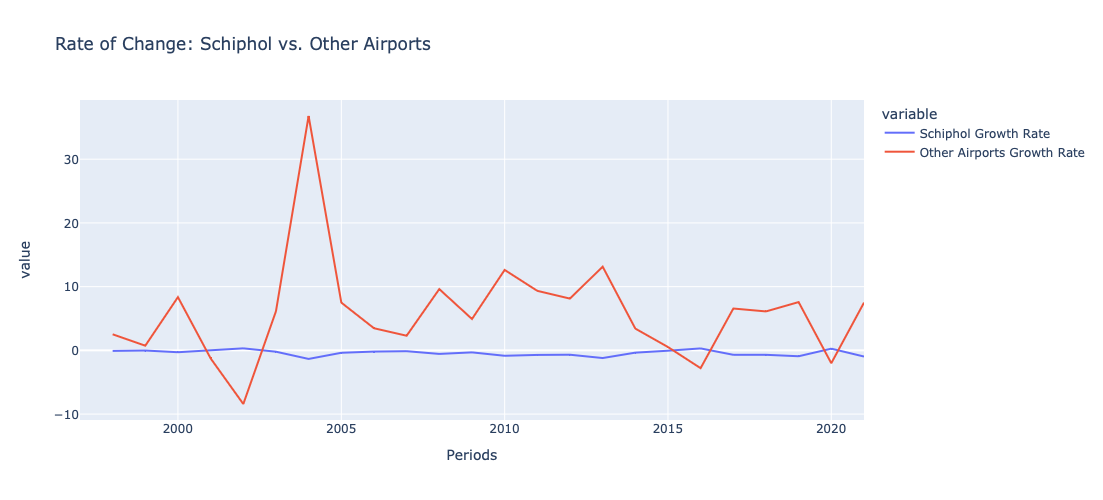

In [12]:
# Calculate the year-on-year growth rate
passenger_df['Schiphol Growth Rate'] = passenger_df['Schiphol Percentage'].pct_change() * 100
passenger_df['Other Airports Growth Rate'] = passenger_df['Other Airports Percentage'].pct_change() * 100

# Create a new line chart
fig_growth = px.line(passenger_df, x='Periods', y=['Schiphol Growth Rate', 'Other Airports Growth Rate'],
                     title='Rate of Change: Schiphol vs. Other Airports',
                     labels={'Schiphol Growth Rate': 'Schiphol Growth Rate (%)',
                             'Other Airports Growth Rate': 'Other Airports Growth Rate (%)'})

fig_growth.update_layout(width=1100, height=500)
fig_growth.show()


Likewise, in the previous explanation, smaller airports opened new bases to operate to new destinations from budget airports. This resulted in more fluctuations in Other airports'. If a smaller airport launches new airlines, there is a robust significant impact on the relative number of flights per day. According to the graph, there is an extensive intervention in 2004.

### Part 3 - Data visualizing

To find out wether there is a correlation between mean wealth in the Netherlands and the number of flights of each of the three main Dutch airports a correlation matrix is plotted. 

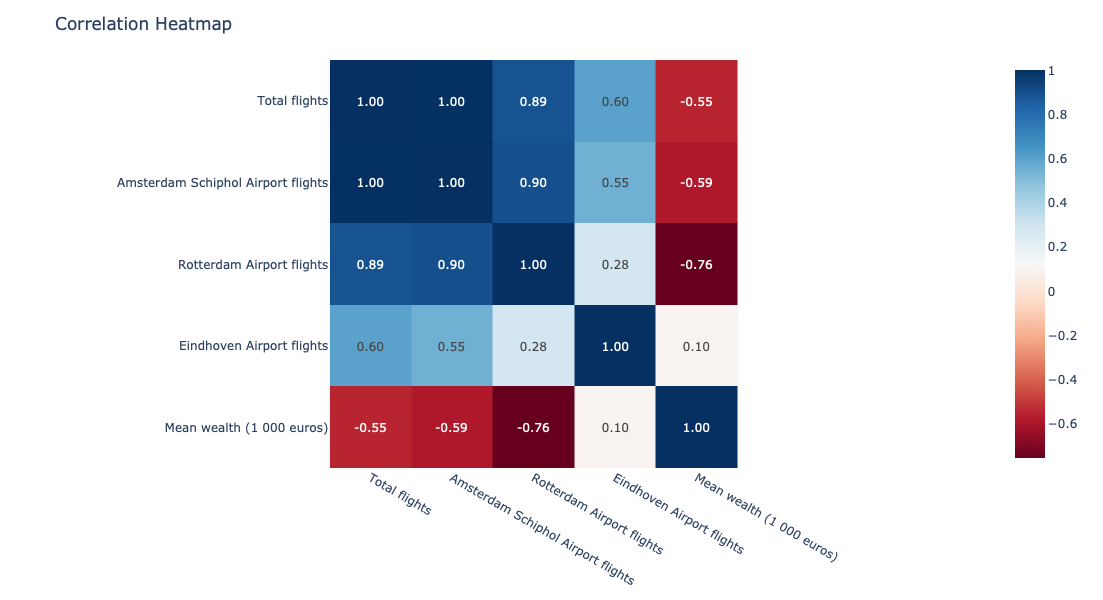

In [13]:
#Visualisation of the correlation between the wealth and the number of flights from the 3 main airports and the total flights
columns = ['Total flights', 'Amsterdam Schiphol Airport flights', 'Rotterdam Airport flights', 'Eindhoven Airport flights', 'Mean wealth (1 000 euros)' ]

# Combine the 'flight' DataFrame and 'wealth' DataFrame based on the same index (Year)
combined_data = pd.concat([flight, wealth], axis=1)

# Calculate the correlation matrix for the selected columns
correlation_data = combined_data[columns]

# Create a correlation heatmap using Plotly Express
fig = px.imshow(correlation_data.corr(), x=columns, y=columns, color_continuous_scale='rdbu', text_auto='.2f')
fig.update_layout(title='Correlation Heatmap', width=800, height=600)

# Show the interactive heatmap
fig.show()

The results are peculiar because on the one hand the correlation between mean wealth and total flights of all airport, Amsterdam airport, and Rotterdam airport are negative. On the other hand the figure shows that Eindhoven airport is positively correlated with mean wealth. However, a negative correlation means that if the one variabele decreases the other variable increases. So, in this case if the wealth increases the number of flights decreases. Despite this, there is a moderate correlation between total number of flights and mean wealth and between number of flights from Amsterdam and mean wealth. The correlation between Rotterdam and wealth is very strong. Because of this outcome, the relation between Rotterdam and wealth will further be explored. 

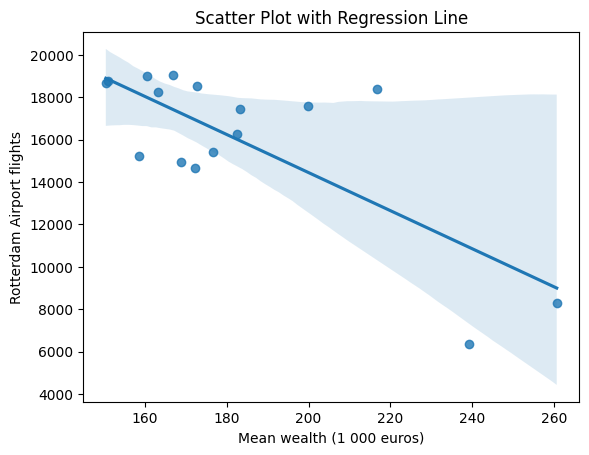

In [14]:
#Data plot in a regression model
sns.regplot(data=correlation_data, x="Mean wealth (1 000 euros)", y="Rotterdam Airport flights", robust = True)

plt.gca().set_title("Scatter Plot with Regression Line")
plt.show()

In the regression plot above it is visible that the correlation between the flights from Rotterdam Airport and the wealth is a negative correlation. So, when the wealth increase (the people have more money to spend) the number of flights to Rotterdam airport decreases. By separately looking at the relationship between the number of flight movements from Rotterdam over time and the relationship between wealth and wealth over time, an underlying reason can be found for the behavior of this relationship.

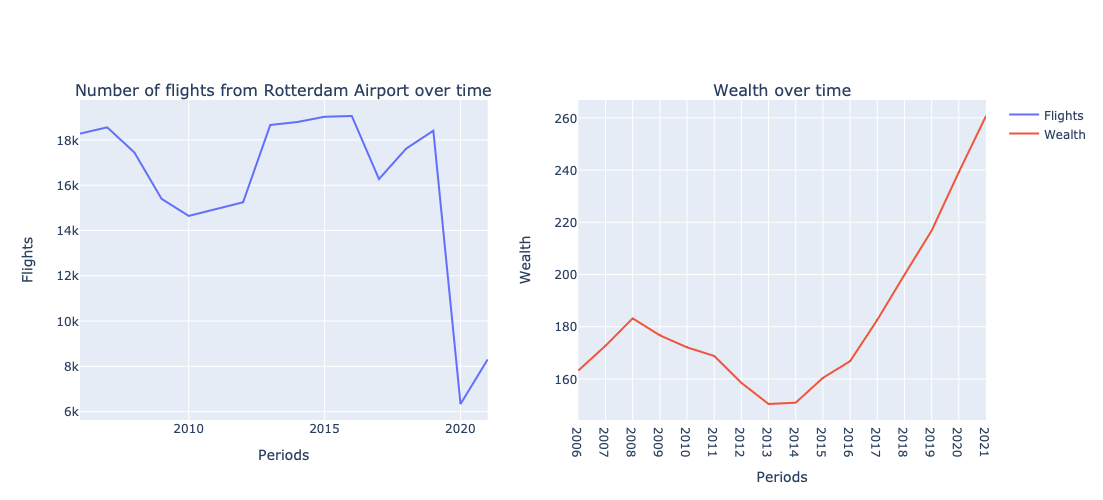

In [15]:
#Plot 2 lineplots next to each other
flight_df = pd.DataFrame(flight)
wealth_df = pd.DataFrame(wealth)

# Create subplots 
fig = make_subplots(rows=1, cols=2, subplot_titles=['Number of flights from Rotterdam Airport over time', 'Wealth over time'])

# Add traces for the two subplots
fig.add_trace(go.Scatter(x=flight_df['Periods'], y=flight_df['Rotterdam Airport flights'], mode='lines', name='Flights'), row=1, col=1)
fig.add_trace(go.Scatter(x=wealth_df['Periods'], y=wealth_df['Mean wealth (1 000 euros)'], mode='lines', name='Wealth'), row=1, col=2)

# Update x-axis and y-axis labels
fig.update_xaxes(title_text='Periods', row=1, col=1)
fig.update_xaxes(title_text='Periods', row=1, col=2)
fig.update_yaxes(title_text='Flights', row=1, col=1)
fig.update_yaxes(title_text='Wealth', row=1, col=2)

fig.update_layout(width=1100, height=500)
fig.show()

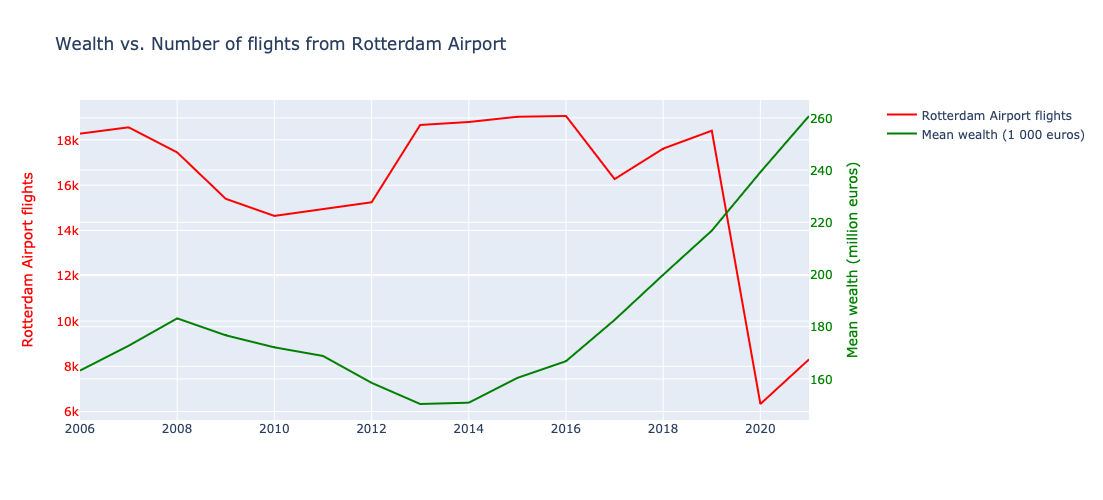

In [16]:
# Create figure
fig = go.Figure()

# Add traces for both y-axes
fig.add_trace(go.Scatter(x=flight_df['Periods'], y=flight_df['Rotterdam Airport flights'], mode='lines', name='Rotterdam Airport flights', line=dict(color='red')))
fig.add_trace(go.Scatter(x=wealth_df['Periods'], y=wealth_df['Mean wealth (1 000 euros)'], mode='lines', name='Mean wealth (1 000 euros)', line=dict(color='green'), yaxis='y2'))

# Update layout to show dual y-axes and adjust legend position and orientation
fig.update_layout(width=1100, height=500, title='Wealth vs. Number of flights from Rotterdam Airport',
                  yaxis=dict(title='Rotterdam Airport flights', side='left', color='red'),
                  yaxis2=dict(title='Mean wealth (million euros)', overlaying='y', side='right', color='green'),
                  legend=dict(x=1.1, y=1.0, traceorder='normal', orientation='v'))

fig.show()


The above graphs represent the relationships between the number of flights from Rotterdam and the wealth indicators seperately over time. In the first graph, they are presented side by side, but then together in a single graph. This presentation makes it easier to compare the line plots, revealing that a decline in wealth is observable earlier in the number of flights than in the wealth trend itself. For instance, it is evident that wealth decreases from around 2008 to 2013, but a decrease in the number of flights begins as early as 2007. The same pattern holds for the COVID-19 crisis in 2019; there was a reduction in flight activity, but this crisis is not yet apparent in the wealth trend.

Further research will be done on the trends on number of fligths between the total Dutch airports and GDP.

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



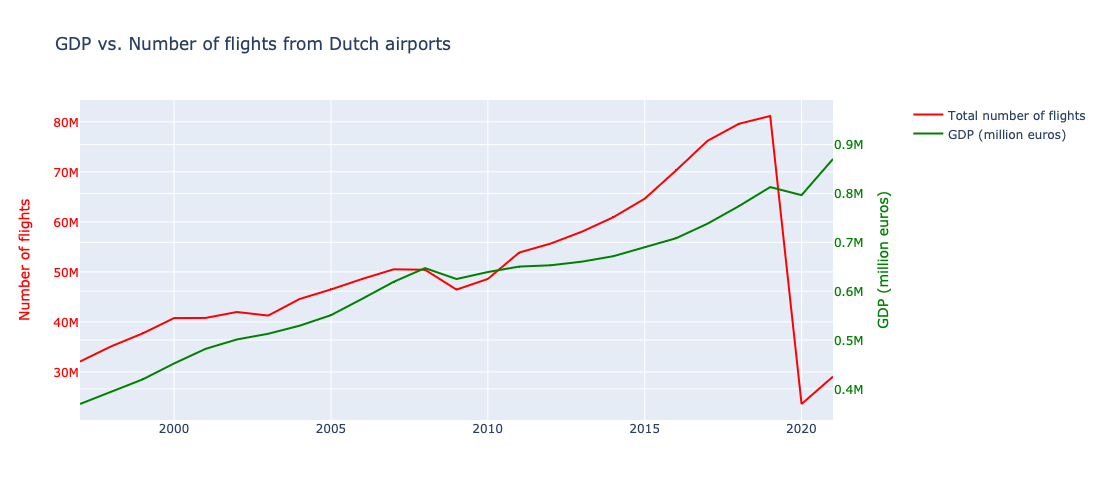

In [17]:
# Create figure
fig = go.Figure()

# Add traces for both y-axes
fig.add_trace(go.Scatter(x=flight_data_year[flight_data_year['Airports'] == 'Total Dutch airports']['Periods'],
                         y=flight_data_year[flight_data_year['Airports'] == 'Total Dutch airports']['Commercial air traffic/Passengers/Total passengers/Total passengers (number)'],
                         mode='lines',
                         name='Total number of flights',
                         line=dict(color='red')))

fig.add_trace(go.Scatter(x=gdp_data['Periods'],
                         y=gdp_data['GDP (million euros)'],
                         mode='lines',
                         name='GDP (million euros)',
                         line=dict(color='green'),
                         yaxis='y2'))

# Update layout to show dual y-axes and adjust legend position and orientation
fig.update_layout(width=1100, height=500, title='GDP vs. Number of flights from Dutch airports',
                  yaxis=dict(title='Number of flights', side='left', color='red'),
                  yaxis2=dict(title='GDP (million euros)', overlaying='y', side='right', color='green'),
                  legend=dict(x=1.1, y=1.0, traceorder='normal', orientation='v'))

fig.show()


There are two notable valleys in this graph. Due to the global financial crisis in 2009, there was a weak significant decrease in GDP, resulting in an even more significant decrease in the total number of flights. Between 2011 and 2019, GDP and total number of flights increased until the covid crisis. As visualised before, the COVID-19 pandemic greatly impacted the total number of flights, whilst slightly impacting the GDP.

### Part 4 - Conclusion

In conclusion, on the one hand, there was a significant cause-consequence due to the financial crisis in 2009 and COVID-19 compared to the GDP. However, on the other hand, an investigation into the economic indicator of wealth showcased how it was less significantly related to the number of operated flights through Dutch airports. Thus, the financial state of the entire country, measured by GDP, can be linked to fluctuations in the number of flights, while a clear link between the wealth of individuals and the number of flights cannot be proven. 
